# Import Package

In [11]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import scipy.stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.naive_bayes import MultinomialNB

# Make Sample Data

In [5]:
N = 100
X1 = scipy.stats.multivariate_normal([ 0, 0], [[0.7, 0],[0, 0.7]]).rvs(100)
X2 = scipy.stats.multivariate_normal([ 1, 1], [[0.8, 0.2],[0.2, 0.8]]).rvs(100)
X3 = scipy.stats.multivariate_normal([-1, 1], [[0.8, 0.2],[0.2, 0.8]]).rvs(100)
y1 = np.zeros(N)
y2 = np.ones(N)
y3 = 2*np.ones(N)
X = np.vstack([X1, X2, X3])
y = np.hstack([y1, y2, y3])


(300,)

# 1. Gaussian Model

In [15]:
from sklearn.naive_bayes import GaussianNB
clf_norm = GaussianNB().fit(X, y)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y, clf_norm.predict(X)))
print(classification_report(y, clf_norm.predict(X)))

[[70 17 13]
 [17 75  8]
 [16  8 76]]
             precision    recall  f1-score   support

        0.0       0.68      0.70      0.69       100
        1.0       0.75      0.75      0.75       100
        2.0       0.78      0.76      0.77       100

avg / total       0.74      0.74      0.74       300



(-4, 5)

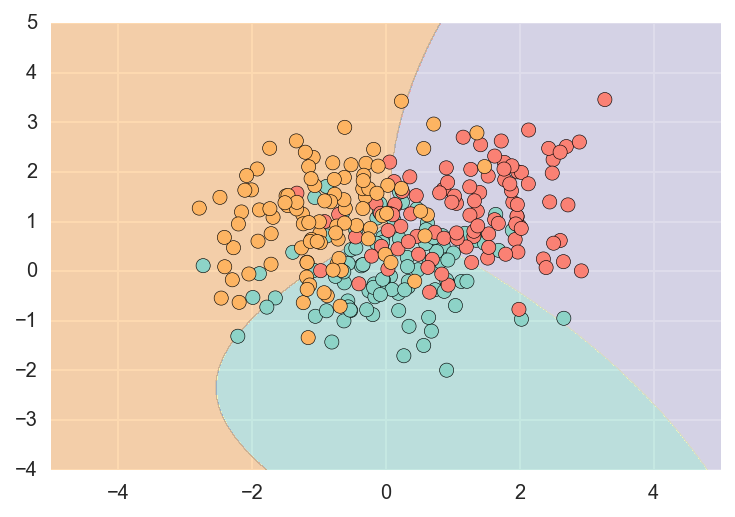

In [18]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(clf_norm.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# 2. QDA(Quadratic Discriminant Analysis) Model

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariances=True).fit(X, y)

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y, qda.predict(X)))
print(classification_report(y, qda.predict(X)))

[[67 16 17]
 [17 74  9]
 [16  7 77]]
             precision    recall  f1-score   support

        0.0       0.67      0.67      0.67       100
        1.0       0.76      0.74      0.75       100
        2.0       0.75      0.77      0.76       100

avg / total       0.73      0.73      0.73       300



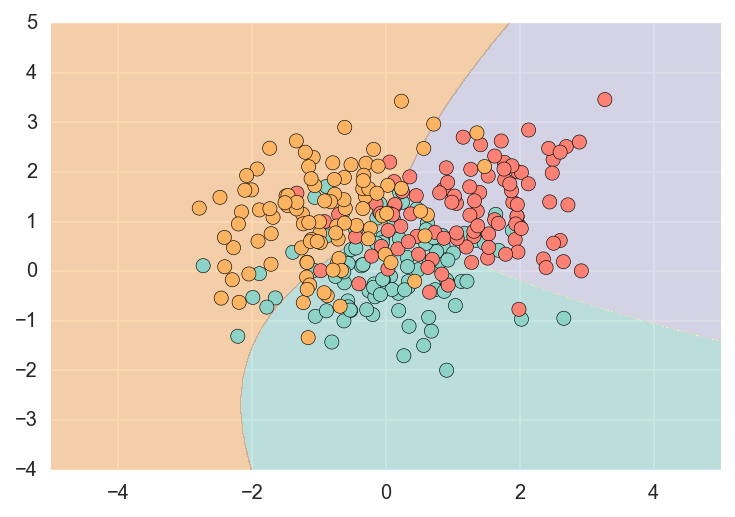

In [12]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(qda.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

# 3. LDA(Linear Discriminant Analysis) Model

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=3, solver="svd", store_covariance=True).fit(X, y)

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y, lda.predict(X)))
print(classification_report(y, lda.predict(X)))

[[68 17 15]
 [17 71 12]
 [16  7 77]]
             precision    recall  f1-score   support

        0.0       0.67      0.68      0.68       100
        1.0       0.75      0.71      0.73       100
        2.0       0.74      0.77      0.75       100

avg / total       0.72      0.72      0.72       300



(-4, 5)

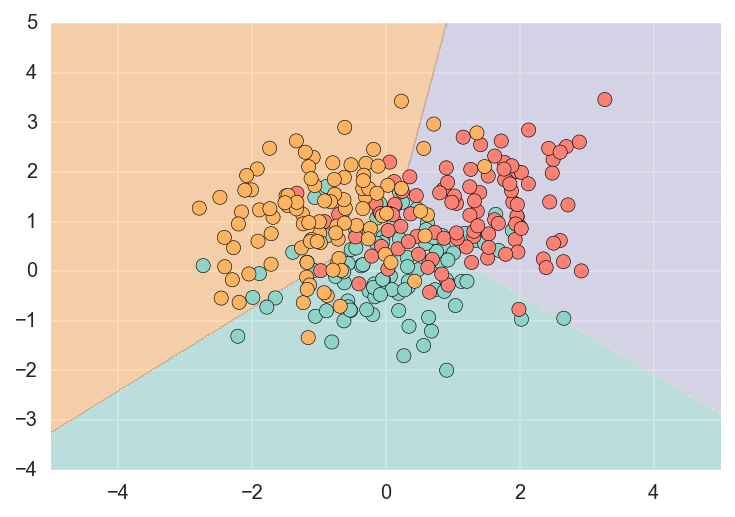

In [23]:
xmin, xmax = -5, 5
ymin, ymax = -4, 5
XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000), np.arange(ymin, ymax, (ymax-ymin)/1000))
ZZ = np.reshape(lda.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set3"))
plt.contourf(XX, YY, ZZ, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=cmap)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)